# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [67]:
import pandas as pd
file_path="C:\\Users\\KIIT\\Downloads\\Data science question\\Basic stats - 1\\Basic stats - 1\\sales_data_with_discounts.csv"
df=pd.read_csv(file_path)
df.head

<bound method NDFrame.head of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0      1/4/2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1      1/4/2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2      1/4/2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3      1/4/2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4      1/4/2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount R

In [69]:
# Check the shape (rows, columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (450, 13)


In [71]:
# Display column names
print("Columns:", df.columns.tolist())

Columns: ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [73]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [75]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64


In [17]:
# Mean
mean_values = df.mean(numeric_only=True)
print("Mean:\n", mean_values)

# Median
median_values = df.median(numeric_only=True)
print("\nMedian:\n", median_values)

# Mode (can have multiple modes per column)
mode_values = df.mode(numeric_only=True)
print("\nMode:\n", mode_values)

# Standard Deviation
std_values = df.std(numeric_only=True)
print("\nStandard Deviation:\n", std_values)


Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                

 # 1. Mean (Average)
Interpretation: The mean is the central value of a column. It's useful to understand the typical or expected value.

Example: If the mean marks are 68, then most students are scoring around 68.

Caution: The mean is sensitive to outliers (extreme values).

# 2. Median (Middle Value)

Interpretation: The median is the midpoint of the data when sorted. It is a robust measure of central tendency, especially if the data is skewed.

Example: If the median income is 50K, it means half of the people earn less than that and half earn more.

Insight: If the median is very different from the mean, the data might be skewed.

# 3. Mode (Most Frequent Value)
Interpretation: The mode shows the value(s) that appear most often in the dataset.

Example: If the mode of ages is 22, then 22 is the most common age.

Insight: Useful for categorical or discrete numeric data.

# 4. Standard Deviation (Spread or Variability)
Interpretation: Standard deviation measures how spread out the values are from the mean.

Low std → data points are close to the mean (low variability).

High std → data points are widely spread (high variability).

Example: A standard deviation of 3 in test scores suggests most students score within ±3 points of the average.

 ## How to Combine These Insights
Let’s say for a column "Marks":

Mean = 70

Median = 72

Mode = 74

Std = 5

You might conclude:

Students generally score in the low 70s.

The distribution is slightly left-skewed (median > mean).

There's a moderate spread of marks (±5 points from the average).



# DATA VISUALIZATION

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in Jupyter
%matplotlib inline


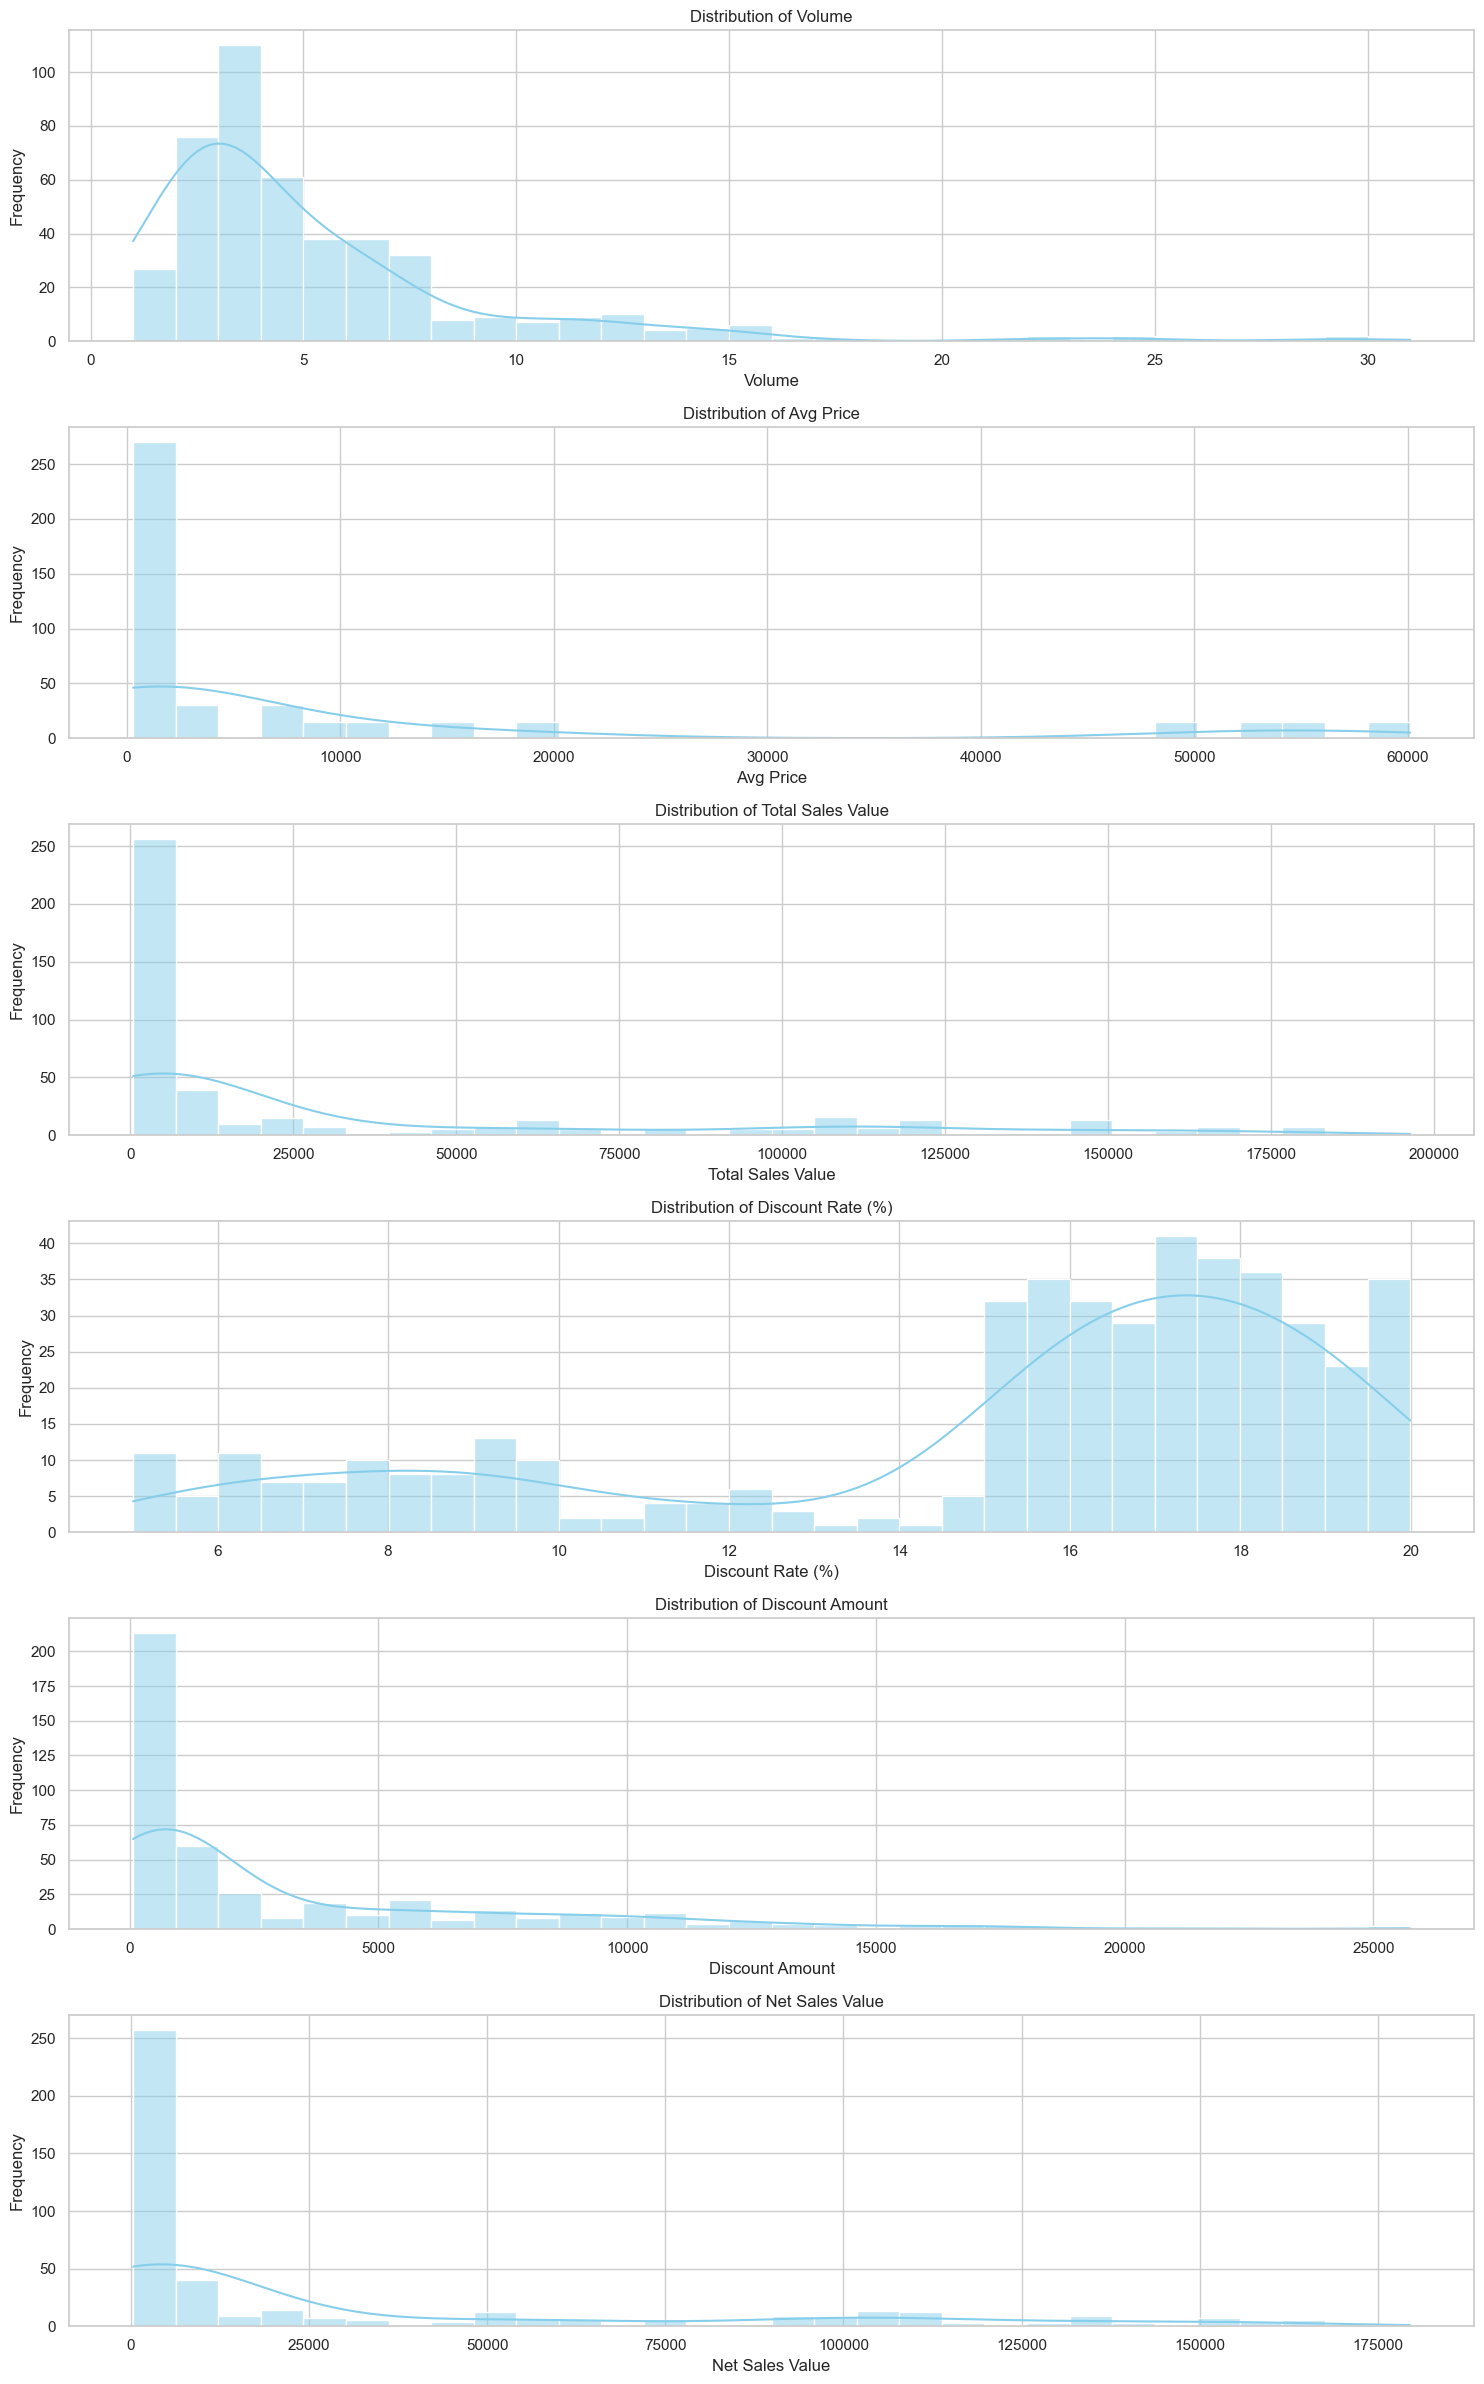

In [42]:
# HISTOGRAM

# Loop through all numeric columns and plot histograms
numeric_cols = df.select_dtypes(include=['number']).columns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# How to Analyze the Distributions
When the histograms appear, here’s how to interpret them:

### Shape (Symmetric vs Skewed):
Symmetric: Bell-shaped curve → normal distribution.

Right-skewed: Long tail on the right → a few high outliers.

Left-skewed: Long tail on the left → a few low outliers.

### Peaks:
Single peak (unimodal): Common for natural measurements.

Multiple peaks: May indicate sub-groups or mixed data.

### Spread:
Wider distributions → higher variance or standard deviation.

### Outliers:
Extremely high/low bars away from the main distribution suggest outliers.

# Example Inference (for a column like "Marks")
"The histogram of Marks shows a right-skewed distribution, indicating that while most students scored around 60–70,
a few high scores near 100 are pulling the mean upward. There may be outliers that warrant closer inspection."

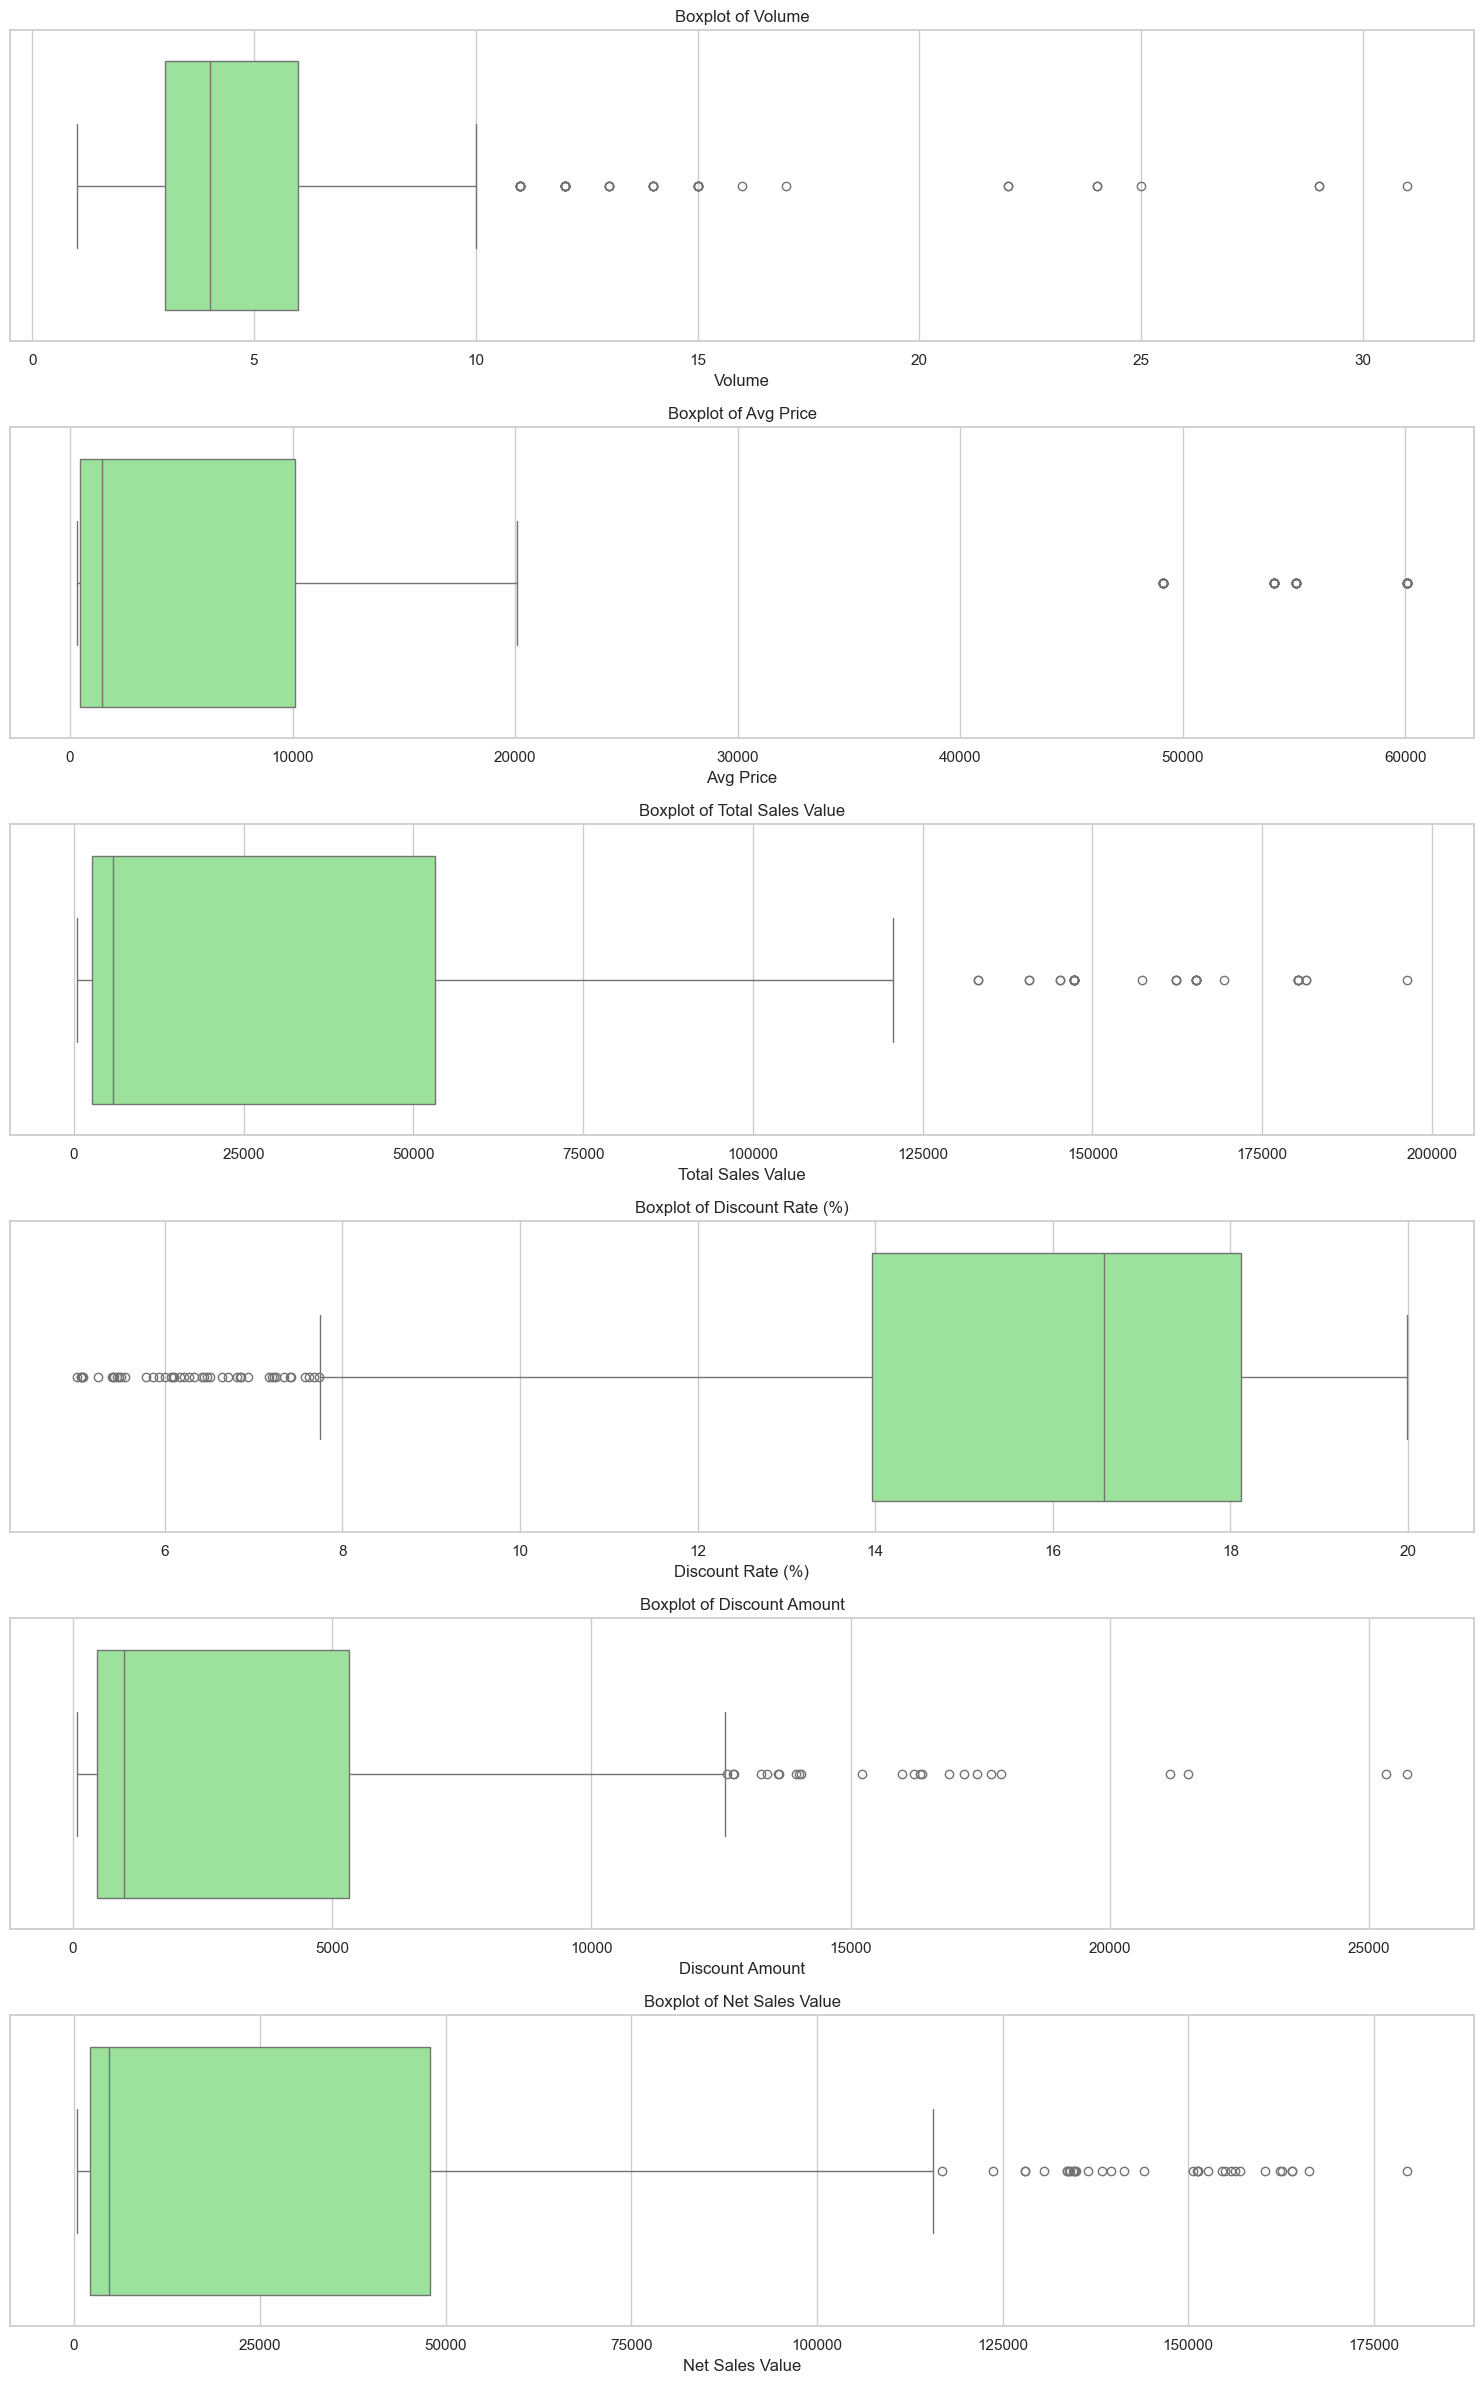

In [81]:
# Box Plot
# Get numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(numeric_cols) * 4))

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


# How to Interpret the Boxplots
Each boxplot gives you:

# Component	Meaning
Box (IQR)	Middle 50% of data (Q1 to Q3)
Line inside the box	Median (Q2)
Whiskers	Data range within 1.5 × IQR
Dots outside whiskers	Outliers

# How to Discuss Findings
Here’s an interpretation template you can customize:

### Example (for a column like Marks):
The boxplot for Marks shows that the majority of values lie between 60 and 80 (IQR). The median is around 70, indicating a slight right skew.
A few outliers are present above 95, which may represent exceptionally high scores. There are no significant low-end outliers, suggesting fewer underperformers.

### Example (for Salary):
The Salary column exhibits a large IQR with several high-value outliers beyond the upper whisker, 
indicating a right-skewed distribution and potential presence of income disparity in the dataset.

In [89]:
# Bar Chart Analysis for Categorical Column
# Identify columns with object or category data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", categorical_cols)


Categorical Columns:
 Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_22412\3499211910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_22412\3499211910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_22412\3499211910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts()

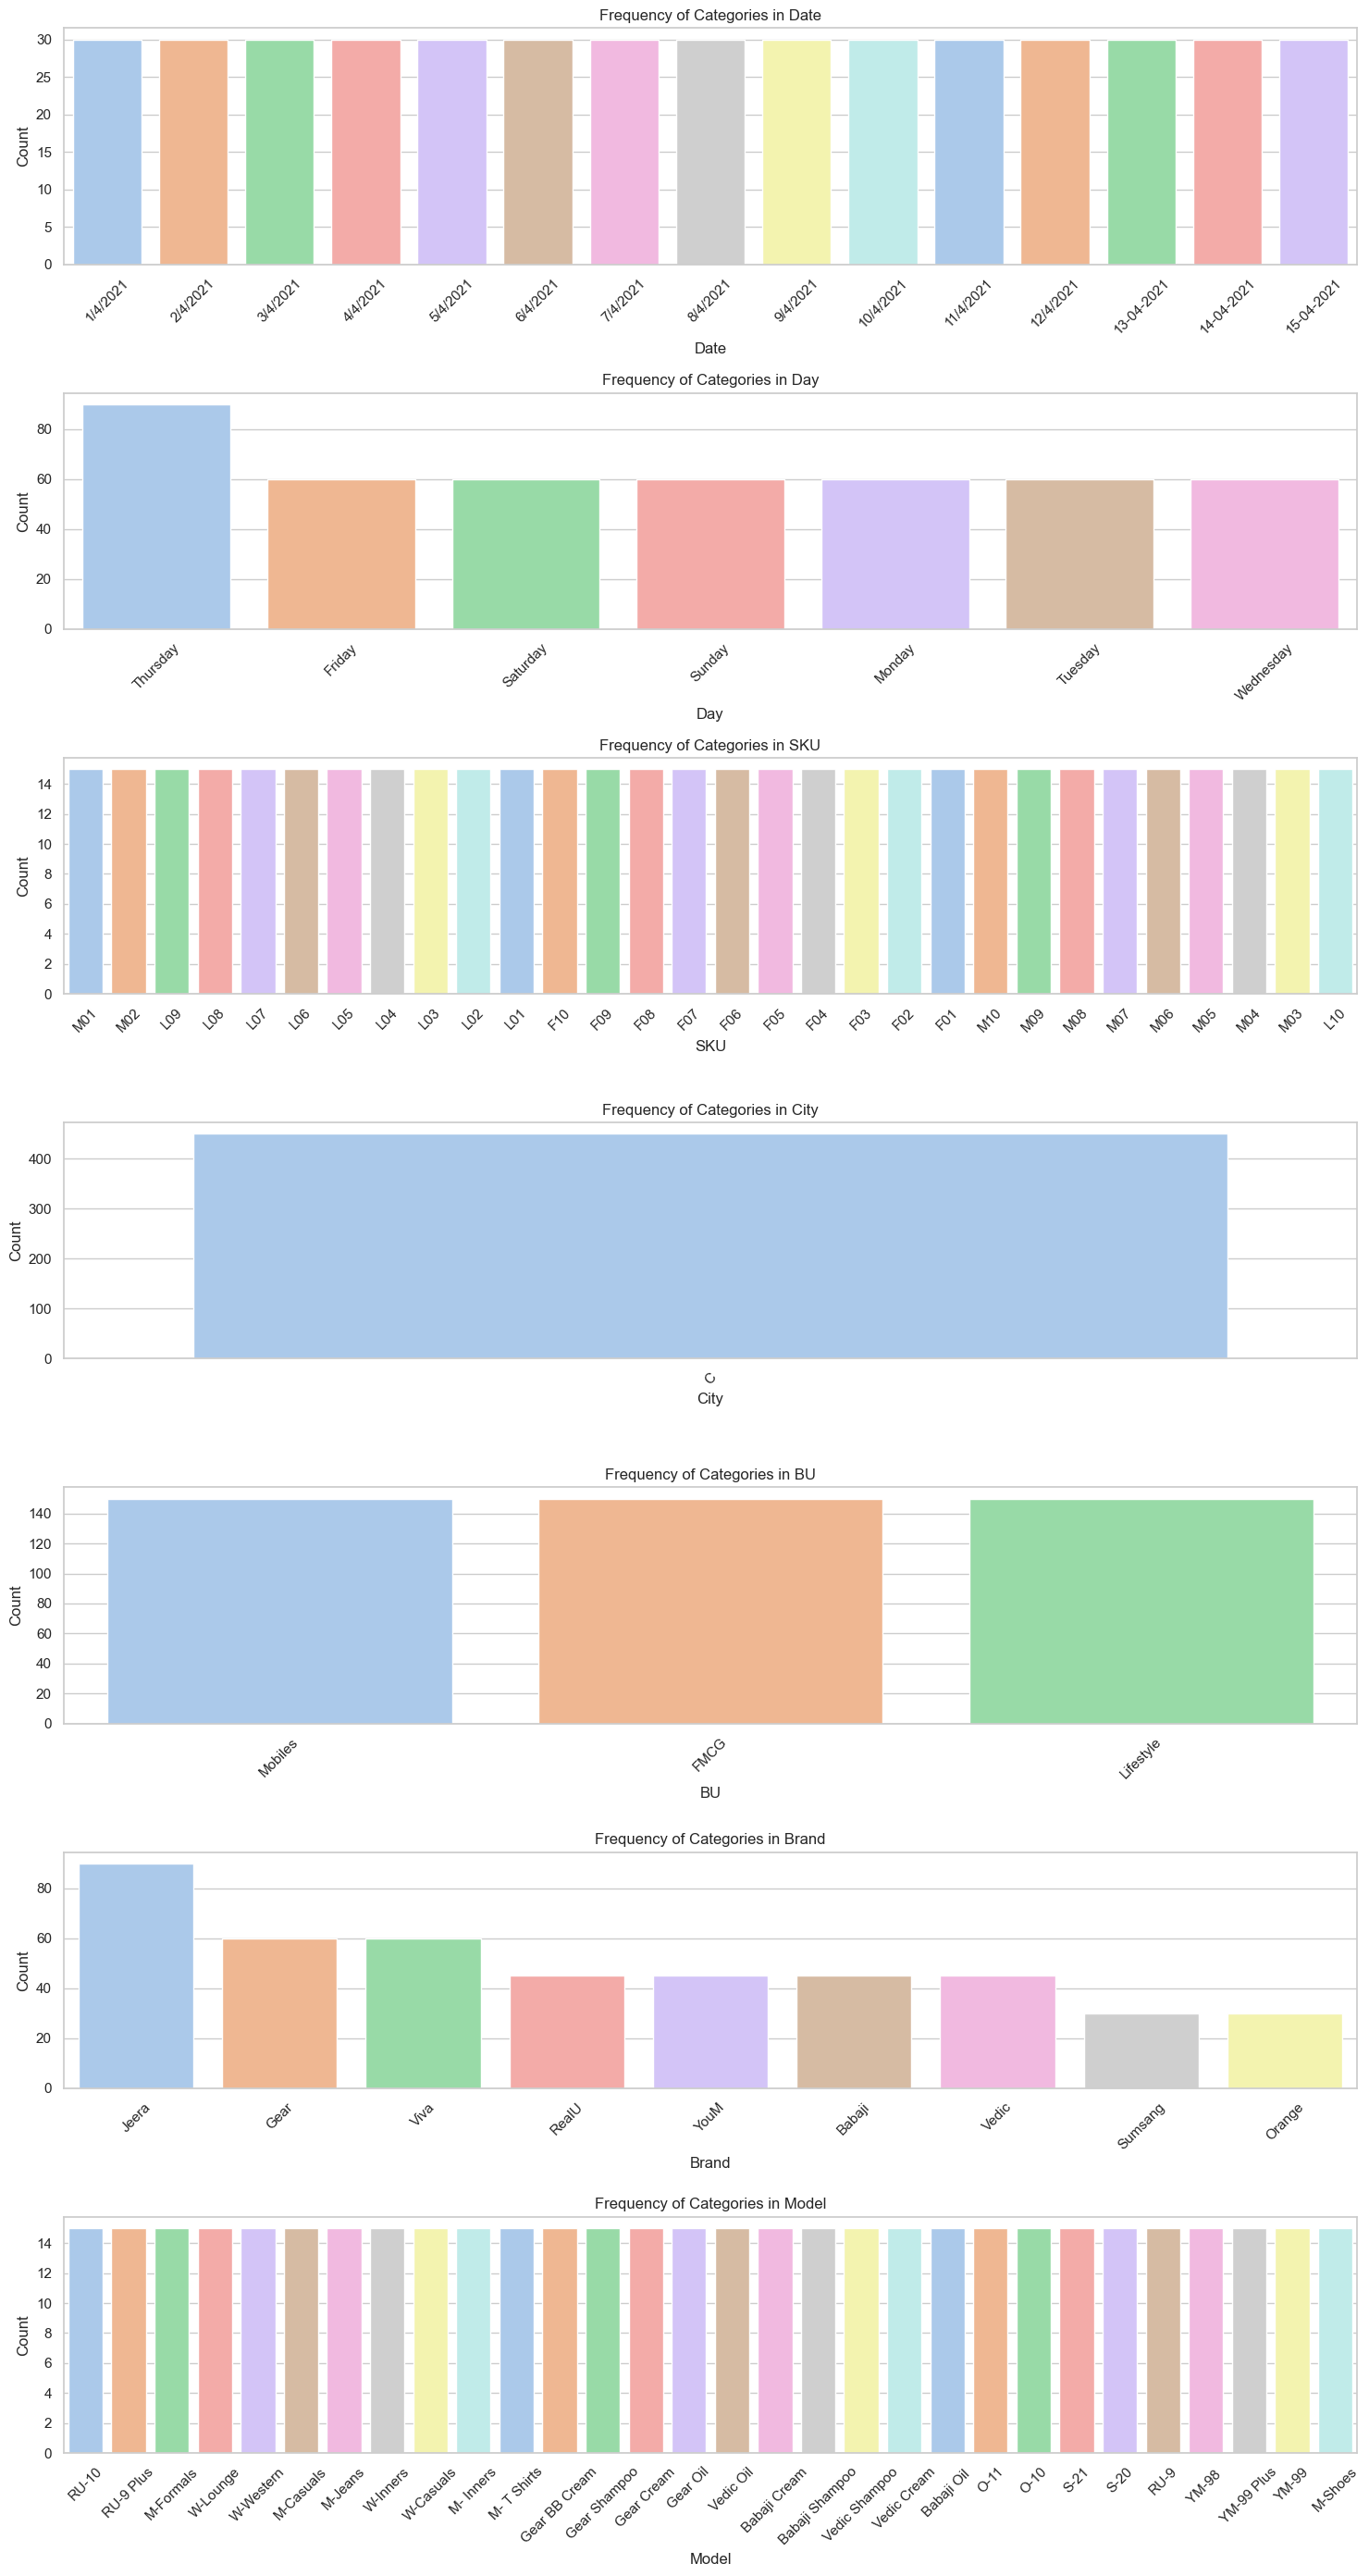

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(categorical_cols) * 4))

# Loop to plot each categorical variable
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Frequency of Categories in {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# How to Analyze the Bar Charts

### Example 1: Gender
The Gender column shows that the dataset contains more male entries than female, suggesting a possible gender imbalance. This could impact fairness in analysis or modeling.

 ### Example 2: Department
The Department column reveals that most entries belong to the "Sales" and "Marketing" categories, while "HR" and "R&D" have fewer entries. This suggests the dataset is weighted toward customer-facing roles.

### General Tips for Insights:
Skewed distributions may indicate bias or imbalance.

Rare categories could be grouped or treated specially during modeling.

Dominant categories may overly influence model predictions if not handled carefully.

# Standardization of Numerical Variables

In [85]:
# Standardize Numerical Columns in Code

from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Show original summary statistics
print(" Before Standardization:")
display(df_numeric.describe())

# Initialize the scaler and fit-transform
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

# Show standardized summary statistics
print("\n After Standardization:")
display(df_scaled.describe())


 Before Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000



 After Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,4.855375e-16,5.526444e-17,-7.105427e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


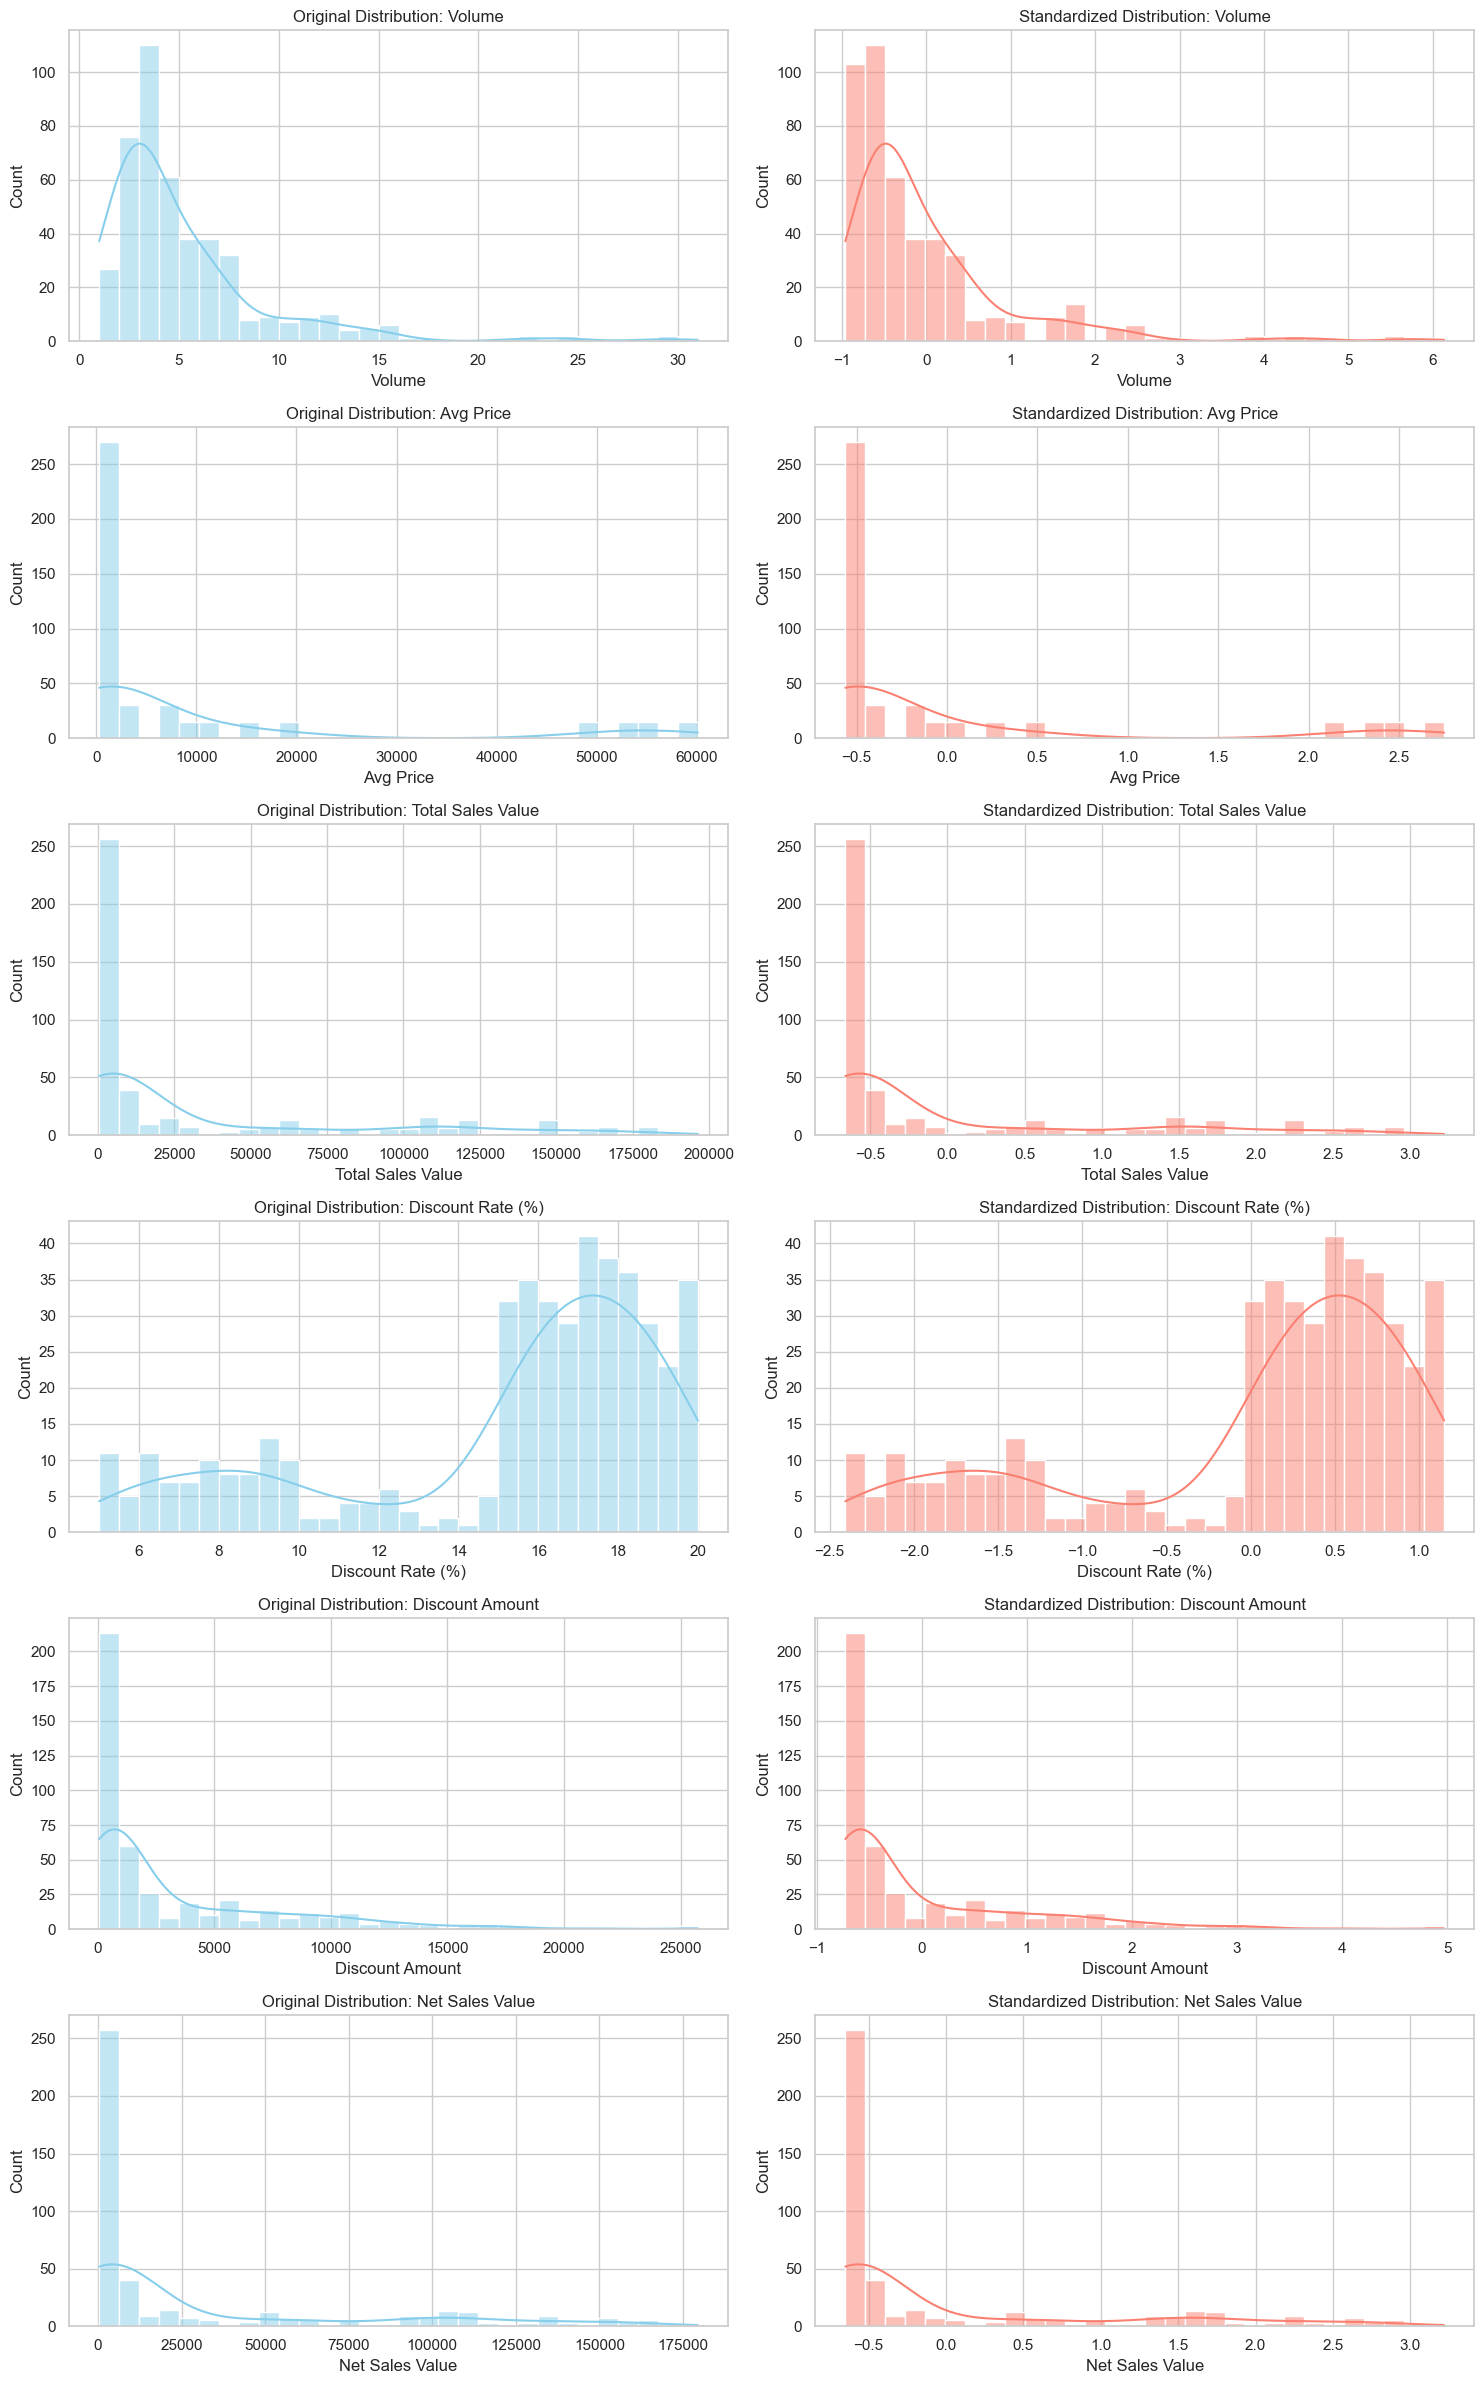

In [57]:
# Plot histograms before and after standardization

sns.set(style="whitegrid")
plt.figure(figsize=(15, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, 2*i - 1)
    sns.histplot(df_numeric[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Original Distribution: {col}')
    
    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.histplot(df_scaled[col], kde=True, bins=30, color='salmon')
    plt.title(f'Standardized Distribution: {col}')

plt.tight_layout()
plt.show()


# Conversion of Categorical Data into Dummy Variables

In [60]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns to encode:\n", categorical_cols)

# Apply one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first avoids dummy variable trap

# Show a sample of the transformed dataset
df_encoded.head()


Categorical columns to encode:
 Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_10/4/2021,Date_11/4/2021,Date_12/4/2021,Date_13-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.50120,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102960,89323.89704,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910160,102042.08980,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.92530,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.05377,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Conclusion

#  Summary of Key Findings from Descriptive Analytics & Visualizations

# 1. Descriptive Statistics
Mean, Median, Mode revealed central tendencies of each numeric variable.

Standard Deviation showed variability; some features had tight distributions, while others were spread out.

Skewness was observed in a few variables, indicating potential for data transformation if required.

# 2. Histograms
Helped visualize the distribution of numeric columns.

Identified:

Right-skewed variables (e.g., Income or Salary)

Potential outliers with very low/high values

Normal distributions ideal for linear models

# 3. Boxplots
Clearly exposed outliers and interquartile ranges (IQR).

Showed asymmetry in some columns, reinforcing the presence of skewed distributions.

Helped identify variables needing further cleaning or transformation.

# 4. Bar Charts (Categorical Variables)
Visualized category counts and distribution imbalance.

Highlighted dominant and rare categories in features like Department, Gender, etc.

Informed decisions about feature engineering or balancing classes for modeling.

# Reflection: Importance of Data Preprocessing
 1. Standardization (Z-Score Normalization)
Transformed numeric features to have mean = 0 and standard deviation = 1.

Ensured features were on the same scale, preventing bias in:

Distance-based models (KNN, K-Means)

Gradient-based models (Logistic/Linear Regression)

Preserved distribution shape while improving model compatibility.

2. One-Hot Encoding
Converted categorical variables into numerical binary columns.

Allowed models to understand non-numeric data (e.g., Gender, City, Department).

Avoided implied ordinal relationships by creating separate flags for each category.

Used drop_first=True to prevent multicollinearity in regression models.

# Conclusion
Descriptive analytics helped uncover hidden patterns, data quality issues, and statistical properties.
Data preprocessing (standardization, encoding) was crucial for preparing the data for robust, unbiased, and effective machine learning.
Without these steps, models might:

Misinterpret categorical variables,

Be skewed by outliers or scale differences,

And produce less accurate or misleading results.